About Data:
https://www.kaggle.com/datasets/shuofxz/titanic-machine-learning-from-disaster

# Describtion

> SibSp is the number of siblings or spouse of a person onboard. A maximum of 8 siblings and spouses traveled along with one of the traveler. More than 90% of people traveled alone or with one of their sibling or spouse. The chances of survival dropped drastically if someone traveled with more than 2 siblings or spouse.

> Parch: Similar to the SibSp, this feature contained the number of parents or children each passenger was touring with. A maximum of 9 parents/children traveled along with one of the traveler.
I added the number of ‘Parch’ and ‘SibSp’ values to store in a new column named ‘Family’

> Fare: By splitting the fare amount into four categories, it was obvious that there was a strong association between the charge and the survival. The higher a tourist paid, the higher would be his chances to survive.

> Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown. 

In [114]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [199]:
data= pd.read_csv("train.csv")

In [200]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [201]:
data.shape

(891, 12)

In [202]:
data.drop(columns=["PassengerId" , "Ticket" , "Cabin"] , inplace=True , axis= 1)

In [203]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


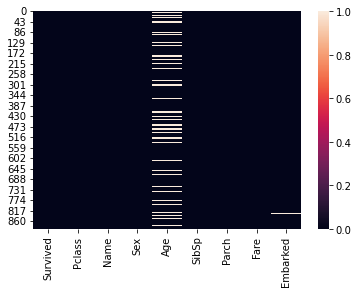

In [205]:
sns.heatmap(data.isna());

In [206]:
data.Age.fillna(data.Age.mean() , inplace= True)

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


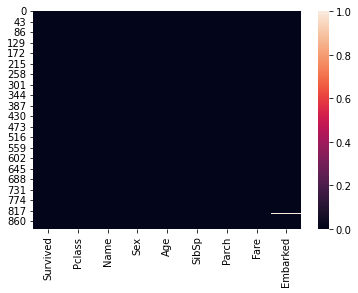

In [208]:
sns.heatmap(data.isna());

In [209]:
data.dropna(inplace= True)

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [211]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [212]:
data["Family"] = data.SibSp + data.Parch

In [213]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S,3
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,0


In [130]:
# scq= pd.get_dummies(data.Embarked)

In [131]:
# data= pd.concat([data , scq] , axis= 1)

In [214]:
data.drop(["Parch" , "SibSp" ] , axis= 1 , inplace=True)

In [215]:
# data.to_csv("New Titanic Dataset.csv")

# َQ1: Bigger 10 people live & dead 

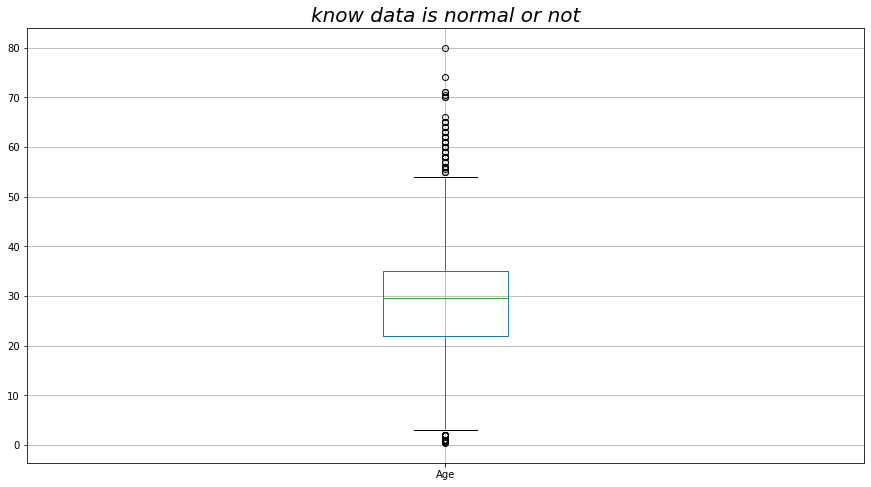

In [216]:
plt.figure(figsize=(15, 8))
data.boxplot("Age");
plt.title("know data is normal or not" , color= "black" , fontstyle= "italic" , fontsize=  20)

plt.show()

In [217]:
data.head(2)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1


In [218]:
Age = pd.DataFrame(data["Age"].sort_values(ascending= False))
Age["Name"] = data["Name"]
Age["Survived"] = data["Survived"]

Age

,Age,Name,Survived
630,80.00,"Barkworth, Mr. Algernon Henry Wilson",1
851,74.00,"Svensson, Mr. Johan",0
493,71.00,"Artagaveytia, Mr. Ramon",0
96,71.00,"Goldschmidt, Mr. George B",0
116,70.50,"Connors, Mr. Patrick",0
...,...,...,...
78,0.83,"Caldwell, Master. Alden Gates",1
644,0.75,"Baclini, Miss. Eugenie",1
469,0.75,"Baclini, Miss. Helene Barbara",1
755,0.67,"Hamalainen, Master. Viljo",1


In [219]:
A_L = Age[Age["Survived"] == 1 ]
A_L

,Age,Name,Survived
630,80.00,"Barkworth, Mr. Algernon Henry Wilson",1
275,63.00,"Andrews, Miss. Kornelia Theodosia",1
483,63.00,"Turkula, Mrs. (Hedwig)",1
570,62.00,"Harris, Mr. George",1
366,60.00,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",1
...,...,...,...
78,0.83,"Caldwell, Master. Alden Gates",1
644,0.75,"Baclini, Miss. Eugenie",1
469,0.75,"Baclini, Miss. Helene Barbara",1
755,0.67,"Hamalainen, Master. Viljo",1


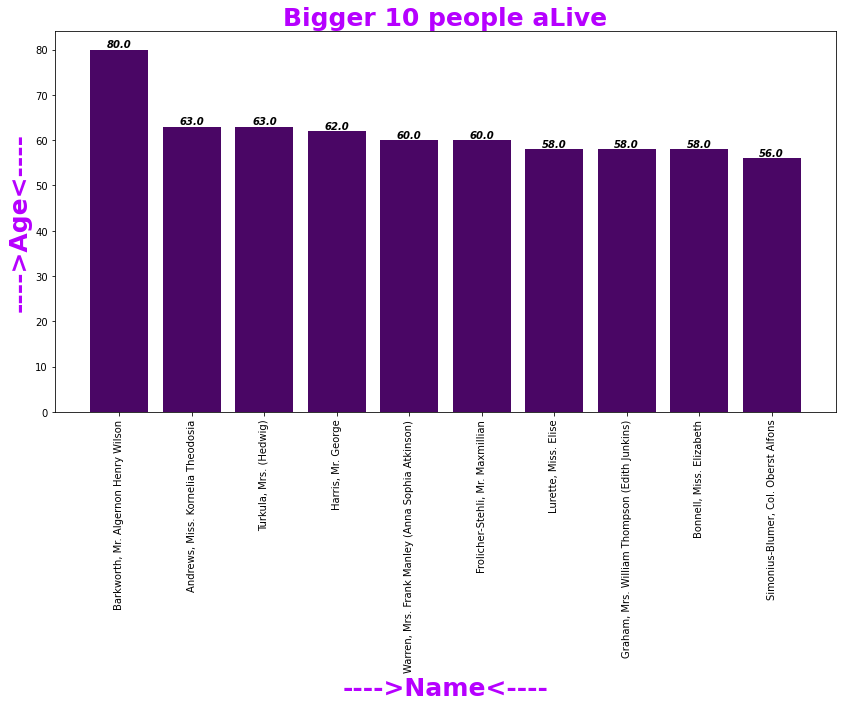

In [220]:
plt.figure(figsize=(14 , 7));

plt.title("Bigger 10 people aLive" , fontsize= 25 , color= '#B600FF' , fontweight= "bold")

plt.bar(x= A_L["Name"][:10] , height= A_L["Age"][:10] , color= '#4A0665')

plt.xlabel("---->Name<----" , color= '#B600FF' , fontsize= 25 , fontweight= "bold")
plt.xticks(rotation= 90)
plt.ylabel("---->Age<----" , color= '#B600FF' , fontsize= 25 , fontweight= "bold")
    
for i in range(10):
    plt.text(i , A_L["Age"].values[i] , A_L["Age"].values[i]
            , fontsize= "10" , fontweight= "bold" , fontstyle= "italic" 
            , va= "bottom", ha= "center")

plt.show()

In [221]:
A_L["Name"][:10]

630                Barkworth, Mr. Algernon Henry Wilson
275                   Andrews, Miss. Kornelia Theodosia
483                              Turkula, Mrs. (Hedwig)
570                                  Harris, Mr. George
366    Warren, Mrs. Frank Manley (Anna Sophia Atkinson)
587                    Frolicher-Stehli, Mr. Maxmillian
195                                Lurette, Miss. Elise
268       Graham, Mrs. William Thompson (Edith Junkins)
11                             Bonnell, Miss. Elizabeth
647                 Simonius-Blumer, Col. Oberst Alfons
Name: Name, dtype: object

In [222]:
D_L = Age[Age["Survived"] == 0 ]
D_L

,Age,Name,Survived
851,74.0,"Svensson, Mr. Johan",0
493,71.0,"Artagaveytia, Mr. Ramon",0
96,71.0,"Goldschmidt, Mr. George B",0
116,70.5,"Connors, Mr. Patrick",0
745,70.0,"Crosby, Capt. Edward Gifford",0
...,...,...,...
119,2.0,"Andersson, Miss. Ellis Anna Maria",0
642,2.0,"Skoog, Miss. Margit Elizabeth",0
297,2.0,"Allison, Miss. Helen Loraine",0
386,1.0,"Goodwin, Master. Sidney Leonard",0


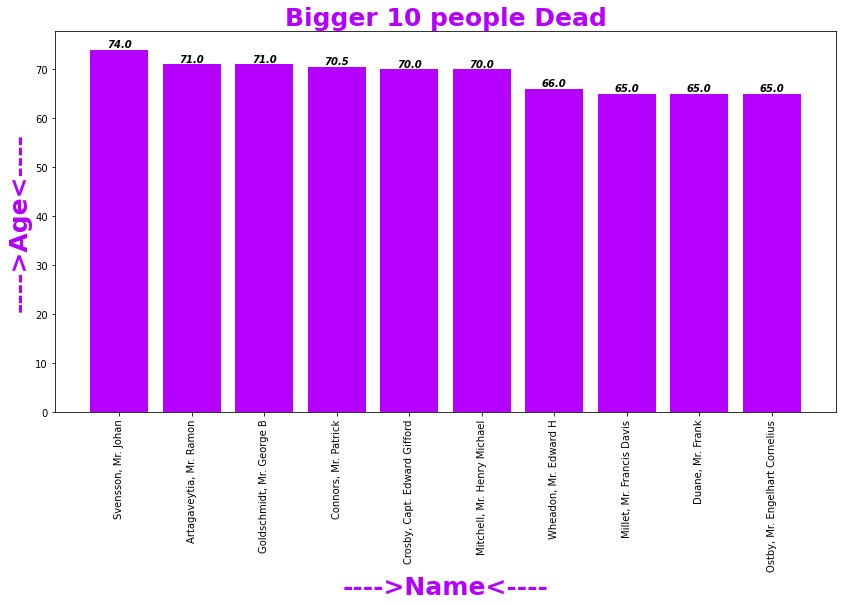

In [223]:
plt.figure(figsize=(14 , 7));

plt.title("Bigger 10 people Dead" , fontsize= 25 , color= '#B600FF' , fontweight= "bold")

plt.bar(x= D_L["Name"][:10] , height= D_L["Age"][:10] , color= '#B600FF')

plt.xlabel("---->Name<----" , color= '#B600FF' , fontsize= 25 , fontweight= "bold")
plt.xticks(rotation= 90)
plt.ylabel("---->Age<----" , color= '#B600FF' , fontsize= 25 , fontweight= "bold")

for i in range(10):
    plt.text(i , D_L["Age"].values[i] , D_L["Age"].values[i]
            , fontsize= "10" , fontweight= "bold" , fontstyle= "italic" 
            , va= "bottom", ha= "center")

plt.show()

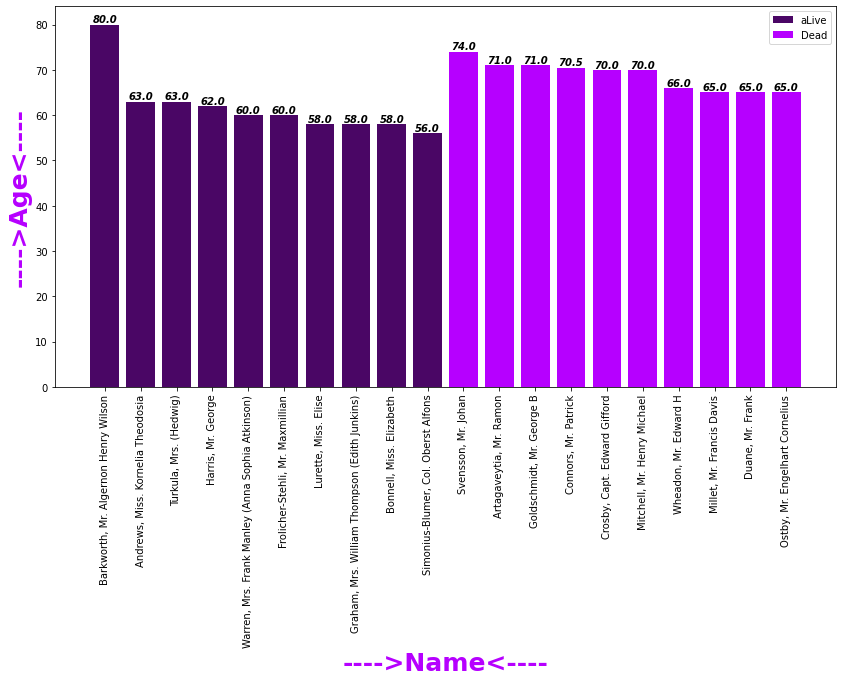

In [224]:
plt.figure(figsize=(14 , 7));

plt.bar(x= A_L["Name"][:10] , height= A_L["Age"][:10] , color= '#4A0665' , label= "aLive")
plt.bar(x= D_L["Name"][:10] , height= D_L["Age"][:10] , color= '#B600FF' , label= "Dead")

plt.xlabel("---->Name<----" , color= '#B600FF' , fontsize= 25 , fontweight= "bold")
plt.xticks(rotation= 90)
plt.ylabel("---->Age<----" , color= '#B600FF' , fontsize= 25 , fontweight= "bold")

for i in range(10):
    plt.text(i , A_L["Age"].values[i] , A_L["Age"].values[i]
            , fontsize= "10" , fontweight= "bold" , fontstyle= "italic" 
            , va= "bottom", ha= "center")
    
for i in list(range(10 , 20)):
    plt.text(i , D_L["Age"].values[i-10] , D_L["Age"].values[i-10]
            , fontsize= "10" , fontweight= "bold" , fontstyle= "italic" 
            , va= "bottom", ha= "center")
    
plt.legend()

plt.show()

In [225]:
data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0


In [226]:
data.groupby("Pclass").Survived.value_counts()

Pclass  Survived
1       1           134
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

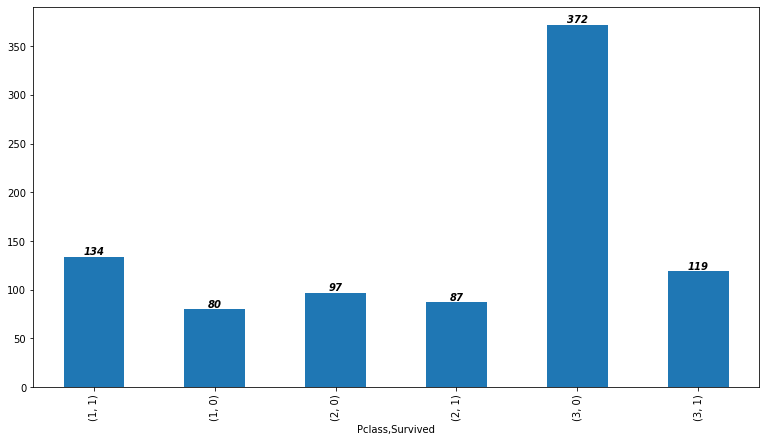

In [227]:
plt.figure(figsize=(13 , 7))
data.groupby("Pclass").Survived.value_counts().plot.bar()

for i in range(6):
    plt.text(i , data.groupby("Pclass").Survived.value_counts().values[i] , data.groupby("Pclass").Survived.value_counts().values[i]
            , fontsize= "10" , fontweight= "bold" , fontstyle= "italic" 
            , va= "bottom", ha= "center")
    
plt.show()

In [228]:
data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0


In [229]:
fare_data= pd.DataFrame(data.Fare.sort_values(ascending=False))
fare_data["Survive"] = data.Survived



In [230]:
fare_data

,Fare,Survive
258,512.3292,1
737,512.3292,1
679,512.3292,1
341,263.0000,1
27,263.0000,0
...,...,...
815,0.0000,0
466,0.0000,0
806,0.0000,0
481,0.0000,0


In [231]:
index= fare_data["Survive"].value_counts().index
values= fare_data["Survive"].value_counts().values

0    549
1    340
Name: Survive, dtype: int64


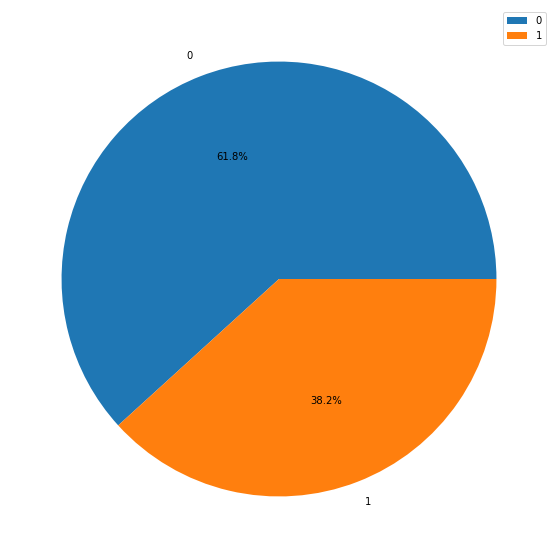

In [232]:
plt.figure(figsize=(10 , 10))
print(fare_data["Survive"].value_counts())

plt.pie(values , autopct= "%1.1f%%" , labels= index)

plt.legend()
plt.show()

In [233]:
fare_data.Fare.describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [234]:
fare= fare_data[fare_data["Fare"] >= 32]
fare

,Fare,Survive
258,512.3292,1
737,512.3292,1
679,512.3292,1
341,263.0000,1
27,263.0000,0
...,...,...
848,33.0000,0
596,33.0000,1
720,33.0000,1
416,32.5000,1


In [235]:
fare.groupby("Survive").Fare.sum()

Survive
0     6311.6416
1    12870.3710
Name: Fare, dtype: float64

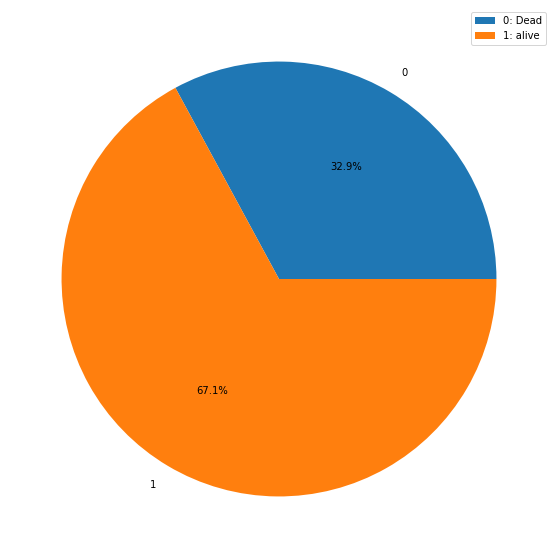

In [236]:
index= fare.groupby("Survive").Fare.sum().index
values= fare.groupby("Survive").Fare.sum().values

plt.figure(figsize=(10 , 10));
labels= ["0: Dead" , "1: alive"]
plt.pie(values , labels= index , autopct= "%1.1f%%" )

plt.legend(labels= labels)
plt.show()

In [237]:
data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0


In [238]:
data.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [239]:
gender_column= pd.get_dummies(data.Sex, drop_first= True)
gender_column

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [240]:
data["Sex"] = gender_column

In [241]:
data.drop(columns=["Name"] , inplace= True)

In [242]:
data

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22.000000,7.2500,S,1
1,1,1,0,38.000000,71.2833,C,1
2,1,3,0,26.000000,7.9250,S,0
3,1,1,0,35.000000,53.1000,S,1
4,0,3,1,35.000000,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,S,0
887,1,1,0,19.000000,30.0000,S,0
888,0,3,0,29.699118,23.4500,S,3
889,1,1,1,26.000000,30.0000,C,0


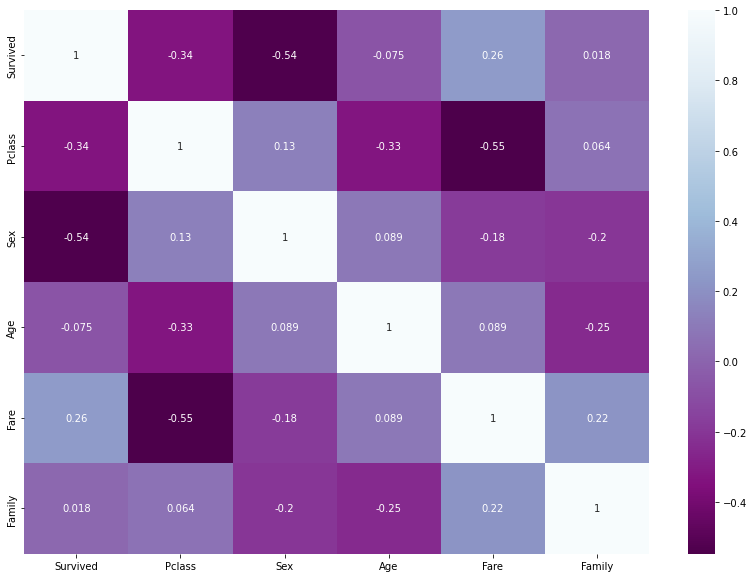

In [243]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr() , cmap='BuPu_r' , annot= True )

plt.show()

In [245]:
index= data["Embarked"].value_counts().index
values= data["Embarked"].value_counts().values

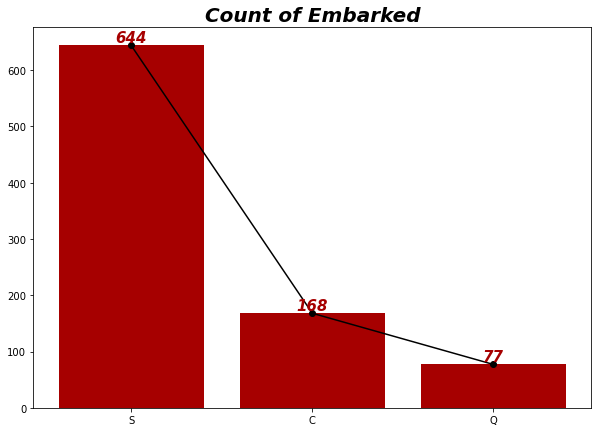

In [261]:
plt.figure(figsize=(10 , 7))

plt.title("Count of Embarked" , fontsize= 20 , fontweight= "bold" , fontstyle= "italic")
plt.bar(x= index , height= values , color= "#A60000")
plt.plot(values , color= "black" , marker= "o")

for i in range(3):
    plt.text(i , values[i] , values[i] , fontsize= "15" , fontweight= "bold" , fontstyle= "italic" 
            , va= "bottom", ha= "center" , color= "#A60000")

plt.show()

In [273]:
S_data= data[data["Embarked"] == "S"]
S_data

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22.000000,7.2500,S,1
2,1,3,0,26.000000,7.9250,S,0
3,1,1,0,35.000000,53.1000,S,1
4,0,3,1,35.000000,8.0500,S,0
6,0,1,1,54.000000,51.8625,S,0
...,...,...,...,...,...,...,...
883,0,2,1,28.000000,10.5000,S,0
884,0,3,1,25.000000,7.0500,S,0
886,0,2,1,27.000000,13.0000,S,0
887,1,1,0,19.000000,30.0000,S,0


In [306]:
def plot(data , title):

    print(S_data.groupby("Survived").Embarked.count())

    index= S_data.groupby("Survived").Embarked.count().index
    values= S_data.groupby("Survived").Embarked.count().values

    plt.figure(figsize=(10 , 10));

    colors= ["#505B92" , "#E28B4F"]
    plt.pie(values , autopct= "%1.1f%%" ,colors = colors )

    plt.title(f"How many people in the {title} Embarked are alive?" , fontsize= 20 , fontweight= "bold" , fontstyle= "italic")
    labels= ["0: Dead" , "1: alive"]
    plt.legend(labels= labels)

    plt.show()

In [307]:
C_data= data[data["Embarked"] == "C"]
Q_data= data[data["Embarked"] == "Q"]

Survived
0    427
1    217
Name: Embarked, dtype: int64


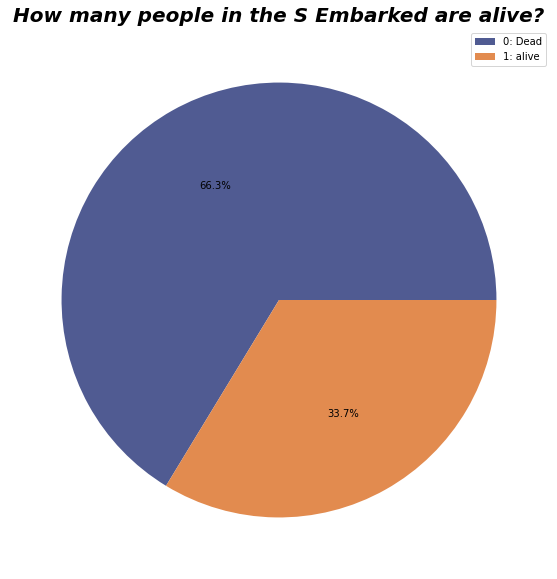

Survived
0    427
1    217
Name: Embarked, dtype: int64


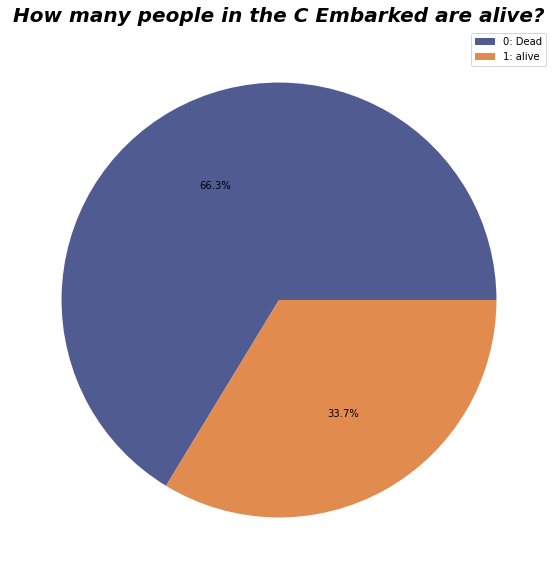

Survived
0    427
1    217
Name: Embarked, dtype: int64


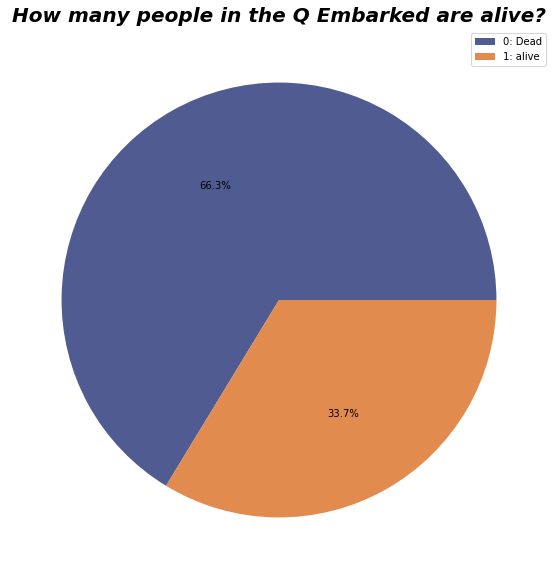

In [308]:
plot(S_data , "S")
plot(C_data , "C")
plot(Q_data , "Q")

In [309]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22.0,7.2500,S,1
1,1,1,0,38.0,71.2833,C,1
2,1,3,0,26.0,7.9250,S,0
3,1,1,0,35.0,53.1000,S,1
4,0,3,1,35.0,8.0500,S,0


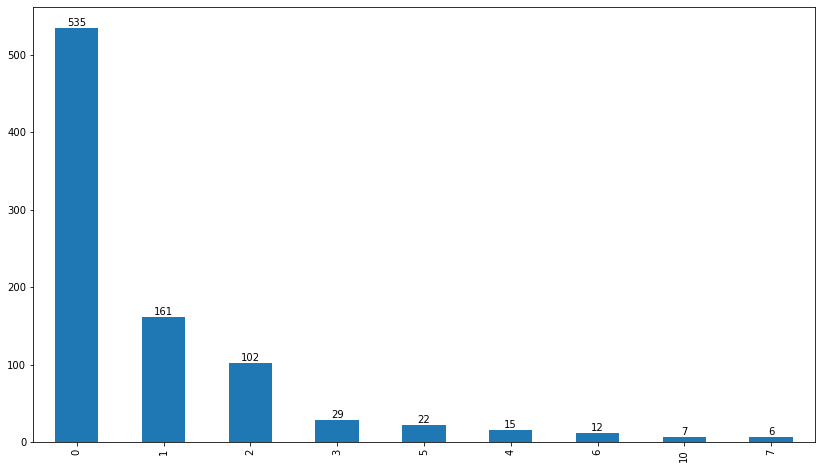

In [322]:
plt.figure(figsize=(14 , 8))

data["Family"].value_counts().plot.bar()


for i in range(9):
    plt.text(i , data["Family"].value_counts().values[i] , data["Family"].value_counts().values[i] ,
             va= "bottom" , ha= "center")
    
plt.show()